Import

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

Obtain Data

In [134]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
uU = pd.read_csv('u.data', sep='\t', names=column_names)
uU.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [135]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [136]:
df = uU.merge(movie_titles)
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


EDA

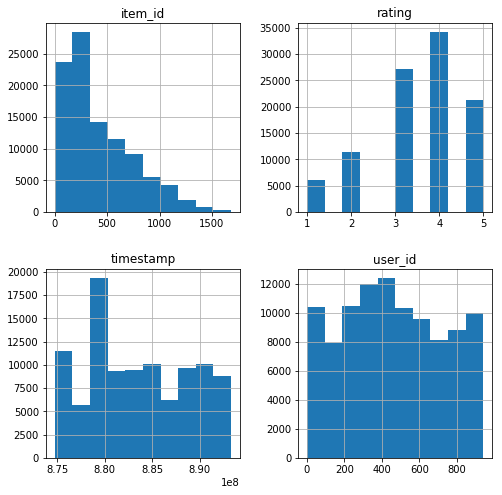

In [137]:
df.hist(figsize=(8,8))
plt.show()

In [138]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [139]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [140]:
ratings = pd.DataFrame(data=df.groupby('title')['rating'].mean())

In [141]:
ratings['number of ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


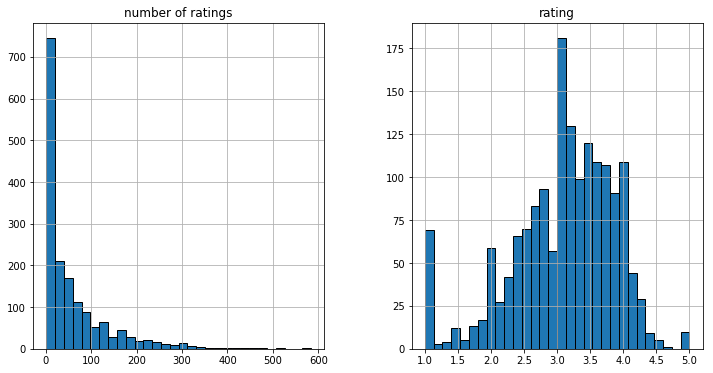

In [142]:
ratings.hist(figsize=(12,6), bins=30, edgecolor='black', linewidth=1)
plt.show()

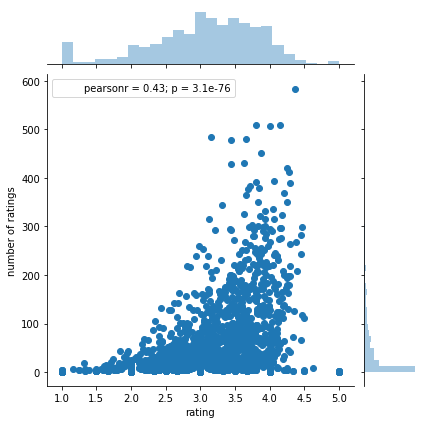

In [143]:
sns.jointplot(x='rating', y='number of ratings', data=ratings)
plt.show()

Setting Up Model Table

In [144]:
movie_mat = df.pivot_table(index='user_id', columns='title', values='rating')
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
#Pick Star Wars, Toy Story, Pulp Fiction
ratings.sort_values('number of ratings', ascending=False).head(10)

,rating,number of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [146]:
starwars_user_ratings = movie_mat['Star Wars (1977)']
toyStory_user_ratings = movie_mat['Toy Story (1995)']
pulpFiction_user_ratings = movie_mat['Pulp Fiction (1994)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [147]:
similar_to_StarWars = movie_mat.corrwith(starwars_user_ratings)
similar_to_ToyStory = movie_mat.corrwith(toyStory_user_ratings)
similar_to_PulpFiction = movie_mat.corrwith(pulpFiction_user_ratings)
similar_to_StarWars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [159]:
corr_StarWars = pd.DataFrame(data=similar_to_StarWars, columns=['Correlation'])
corr_StarWars.dropna(inplace=True)

corr_ToyStory = pd.DataFrame(data=similar_to_ToyStory, columns=['Correlation'])
corr_ToyStory.dropna(inplace=True)

corr_PulpFiction = pd.DataFrame(data=similar_to_PulpFiction, columns=['Correlation'])
corr_PulpFiction.dropna(inplace=True)

In [149]:
corr_StarWars = corr_StarWars.join(ratings['number of ratings'])
corr_StarWars.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [156]:
corr_StarWars[corr_StarWars['number of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [160]:
corr_ToyStory = corr_ToyStory.join(ratings['number of ratings'])
corr_ToyStory.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.534522,9
101 Dalmatians (1996),0.232118,109
12 Angry Men (1957),0.334943,125
187 (1997),0.651857,41
2 Days in the Valley (1996),0.162728,93


In [161]:
corr_ToyStory[corr_ToyStory['number of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,number of ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175


In [162]:
corr_PulpFiction = corr_PulpFiction.join(ratings['number of ratings'])
corr_PulpFiction.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),-0.071429,9
1-900 (1994),0.755929,5
101 Dalmatians (1996),0.045124,109
12 Angry Men (1957),0.051940,125
187 (1997),-0.240381,41


In [163]:
corr_PulpFiction[corr_PulpFiction['number of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,number of ratings
title,,
Pulp Fiction (1994),1.000000,394
"Cable Guy, The (1996)",0.472482,106
Trainspotting (1996),0.451906,250
True Romance (1993),0.416478,104
"People vs. Larry Flynt, The (1996)",0.404107,215
